# Use different clustering algorithm to find out the optimal number of clusters in the data and performing linear regression on each cluster seperately

## Import the nessesary libraries

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### loading Dataset and each column description is specified below
- **Car Name** – Name of the car
- **Cyl** – No of cylinders in the car – Multi-valued discrete
- **Disp** – Displacement – continuous
- **Hp** – Horsepower – continuous
- **Wt** – Weight – continuous
- **Acc** – Acceleration – continuous
- **Yr** – Model of the car – Multivalued discrete
- **Mpg** - Miles per gallon - continuous

In [76]:
cars = pd.read_csv('cars-dataset.csv')

## Head and Tail of dataset

In [77]:
cars.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [78]:
cars.tail()

,car name,cyl,disp,hp,wt,acc,yr,mpg
393,ford mustang gl,4,140.0,86,2790,15.6,82,27.0
394,vw pickup,4,97.0,52,2130,24.6,82,44.0
395,dodge rampage,4,135.0,84,2295,11.6,82,32.0
396,ford ranger,4,120.0,79,2625,18.6,82,28.0
397,chevy s-10,4,119.0,82,2720,19.4,82,31.0


### Shape of Dataset

In [79]:
cars.shape

(398, 8)

> Original dataset has **8 attributes** and **398 records**.

### To check whether dataset contains null values

In [80]:
print(cars.isna().sum().sum())
print(cars.isnull().sum().sum())

0
0


> No columns have null data in the file

### To check datatypes of each columns

In [81]:
cars.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

> - From the above observation we can see that horsepower data type is of object but generally horsepower is continuous numrical quantity.
> - So there are non numerical data present in **hp** which is not valid
> - We need to either replace it with valid numerical data or remove particular data.

In [82]:
cars[cars.hp.apply(lambda x: not x.isnumeric())]['hp']

32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: hp, dtype: object

> - From the above obeservation there are 6 records in **hp** column with value **'?'** which is not valid.
> - We can remove records having hp = '?' as there are only 6 records.

### Remove records with hp = '?' from dataset.

In [83]:
cars_ = cars.drop('car name',axis = 1)[cars.hp.apply(lambda x: x.isnumeric())].apply(pd.to_numeric)

In [84]:
cars_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
cyl     392 non-null int64
disp    392 non-null float64
hp      392 non-null int64
wt      392 non-null int64
acc     392 non-null float64
yr      392 non-null int64
mpg     392 non-null float64
dtypes: float64(3), int64(4)
memory usage: 24.5 KB


> - Using info() method we can observe that there are no numerical values in dataset.
> - Now our dataset has **8 attributes** and **392 records**. We can to our further analysis.

### Using Describe function for stastical analysis of dataset

In [94]:
cars_.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,23.445918
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,7.805007
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,17.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,22.750000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


### Boxplot to analyse each feature individually

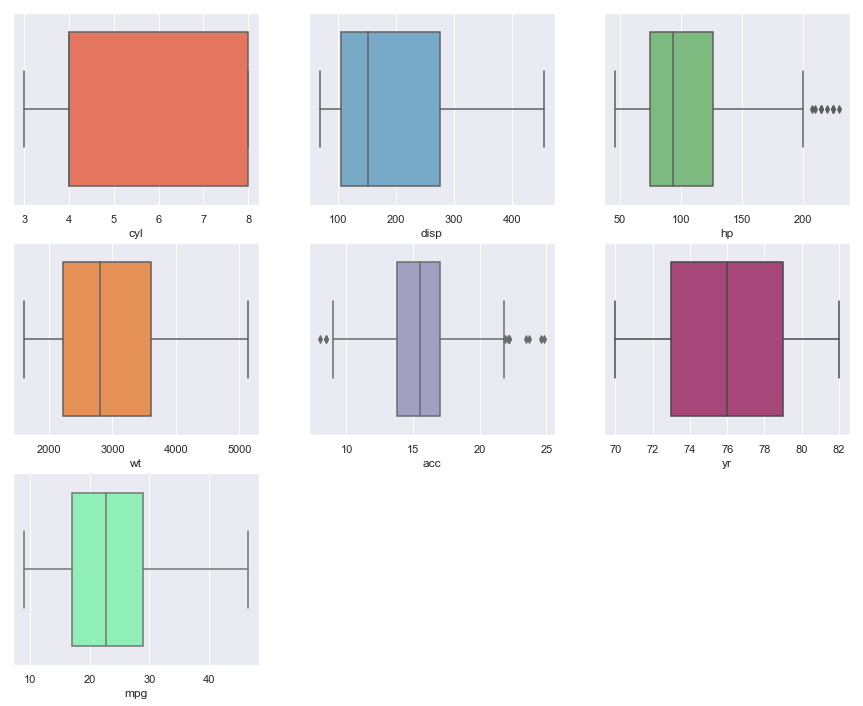

In [193]:
sns.set(style="darkgrid")
#Set up the matplotlib figure
f, axes = plt.subplots(3,3, figsize=(15,12))
sns.boxplot(cars_.cyl, color="r", ax=axes[0,0],palette="Reds")
sns.boxplot(cars_.disp, color="g", ax=axes[0,1],palette="Blues")
sns.boxplot(cars_.hp, color="b", ax=axes[0,2],palette="Greens")
sns.boxplot(cars_.wt, color="r", ax=axes[1,0],palette="Oranges")
sns.boxplot(cars_.acc, color="g", ax=axes[1,1],palette="Purples")
sns.boxplot(cars_.yr, color="b", ax=axes[1,2],palette="magma")
sns.boxplot(cars_.mpg, color="b", ax=axes[2,0],palette="rainbow")
axes[2,1].remove()
axes[2,2].remove();

### Observations from above Boxplot
> + Most of cars having **displacement** between range **100** to **270**.
> + We can obeserve there are outliers present in **Horsepower** and **acceleration**.
> + **Weight** of cars distrubuted maximum between **2200** to **3600** also **mpg**  from **17** to **28**.

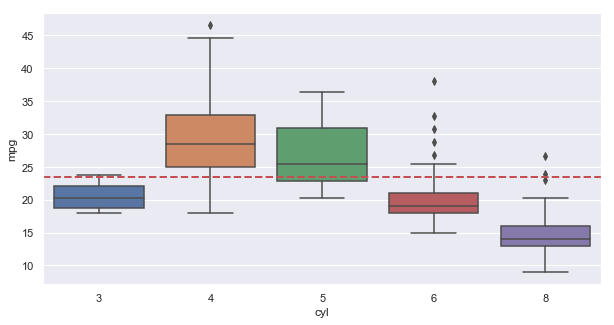

In [205]:
f, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x = cars_['cyl'],y = cars_['mpg'])
plt.axhline(cars_.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

### Observations from above Boxplot
> - Cars having cylinder 4 and 5 are having better mpg as compared to cars having cylinder either 3,6 or 8

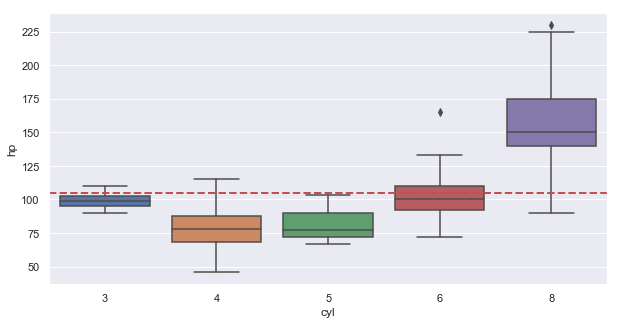

In [208]:
f, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x = cars_['cyl'],y = cars_['hp'])
plt.axhline(cars_.hp.mean(),color='r',linestyle='dashed',linewidth=2)

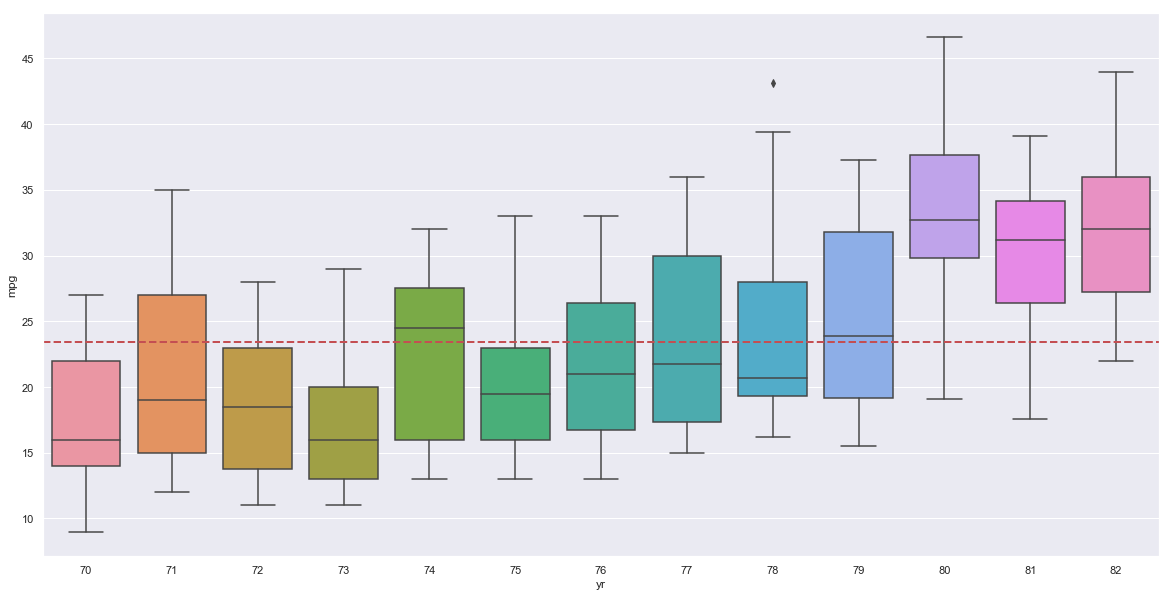

In [216]:
f, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x = cars_['yr'],y = cars_['mpg'])
plt.axhline(cars_.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

### Observations from above Boxplot
> - mpg of cars has been improved yera by year

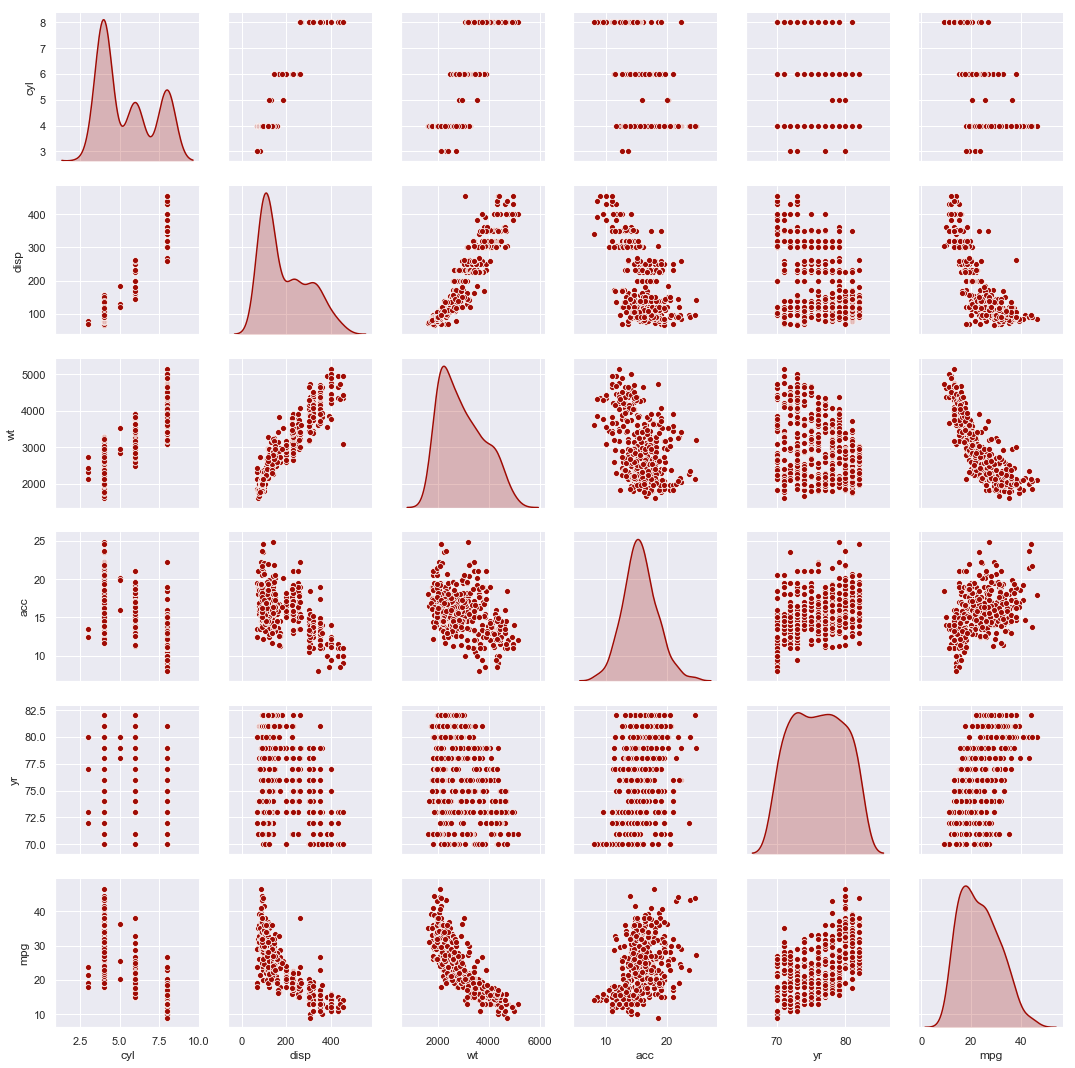

In [163]:
# Create an array with the colors you want to use
colors = ["#9F0B04", "#4374B3"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.pairplot(cars,diag_kind = 'kde');

15.568090452261291
2.7576889298126757


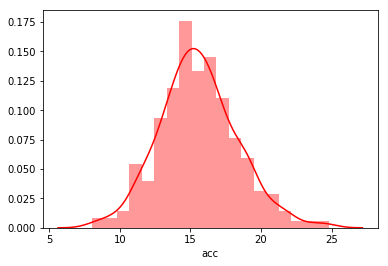

In [4]:
sns.distplot(cars['acc'],color="r");
print(cars.acc.mean())
print(cars.acc.std())

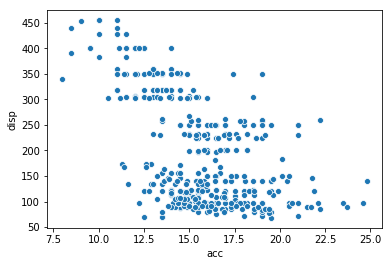

In [5]:
sns.scatterplot(cars.acc,cars.disp);

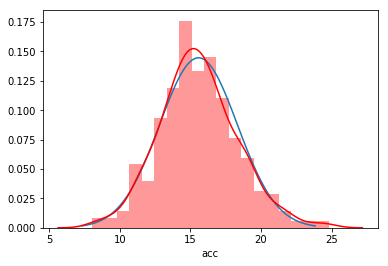

In [6]:
import scipy.stats as stats
mu = cars.acc.mean()
sig = cars.acc.std()
x = np.linspace(mu - 3*sig, mu + 3*sig, 100)
plt.plot(x, stats.norm.pdf(x, mu, sig))
sns.distplot(cars['acc'],color="r")
plt.show()

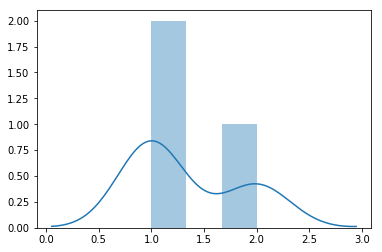

In [7]:
sns.distplot([1,2,1],bins=3)

In [8]:
print('****************************************************************************************************')

****************************************************************************************************


In [9]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
cars.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [10]:
cars.replace('?','0',inplace=True)

In [142]:
from sklearn.preprocessing import normalize
#data_scaled = normalize(cars)
X = pd.DataFrame(data_scaled, columns=cars.drop('car name',axis = 1).columns)
X.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,0.002272,0.087201,0.036926,0.995286,0.003409,0.019883,0.005113
1,0.002154,0.094240,0.044427,0.994364,0.003096,0.018848,0.004039
2,0.002316,0.092048,0.043419,0.994580,0.003184,0.020262,0.005210
3,0.002319,0.088104,0.043472,0.994936,0.003478,0.020287,0.004637
4,0.002308,0.087137,0.040395,0.995153,0.003030,0.020197,0.004905


In [12]:
# Case 1: Ward Method
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z , pdist(X)) # pdist captures within cluster variation
print("Ward",c)
# Case 2: Average Linkage
Z = linkage(X, 'average')
c, coph_dists = cophenet(Z , pdist(X))
print("Average", c)
# Case 3: Complete Linkage
Z = linkage(X, 'complete')
c, coph_dists = cophenet(Z , pdist(X))
print("Complete",c)
Z = linkage(X, 'single')
c, coph_dists = cophenet(Z , pdist(X))
print("Single",c)

Ward 0.7317078392238924
Average 0.8211773052815815
Complete 0.7847630862163489
Single 0.5682926051158124


In [13]:
b = X[['cyl','disp']]

In [14]:
# Case 1: Ward Method
Z = linkage(b, 'ward')
c, coph_dists = cophenet(Z , pdist(b)) # pdist captures within cluster variation
print("Ward",c)
# Case 2: Average Linkage
Z = linkage(b, 'average')
c, coph_dists = cophenet(Z , pdist(b))
print("Average", c)
# Case 3: Complete Linkage
Z = linkage(b, 'complete')
c, coph_dists = cophenet(Z , pdist(b))
print("Complete",c)
Z = linkage(b, 'single')
c, coph_dists = cophenet(Z , pdist(b))
print("Single",c)

Ward 0.727079509459473
Average 0.8249772649695768
Complete 0.7165537543398723
Single 0.4312275702842884


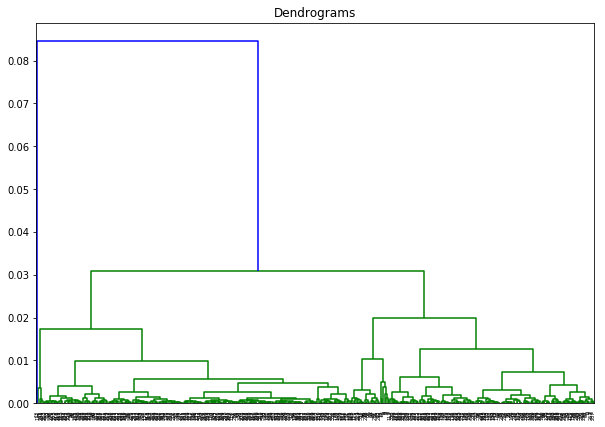

In [15]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(b, method='average'))

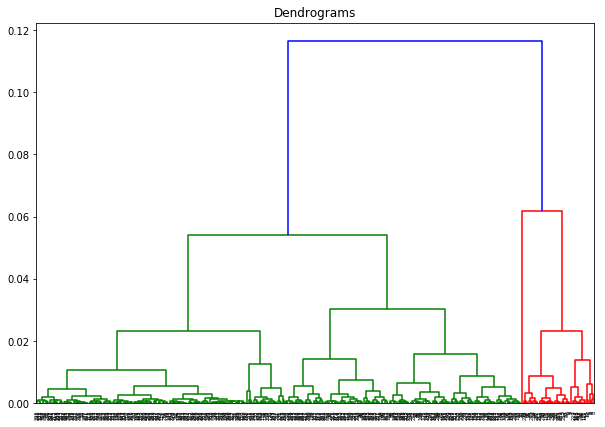

In [16]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(b, method='complete'))

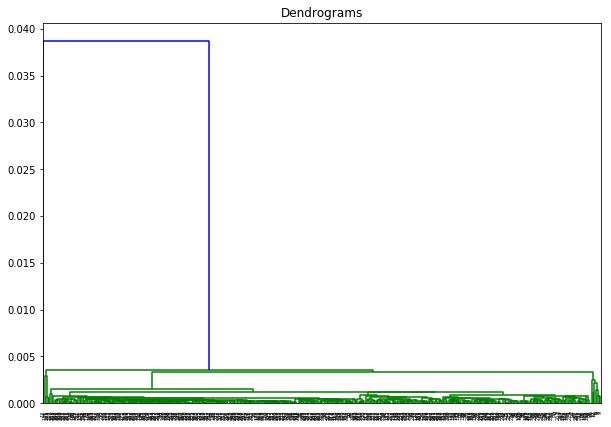

In [17]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(b, method='single'))

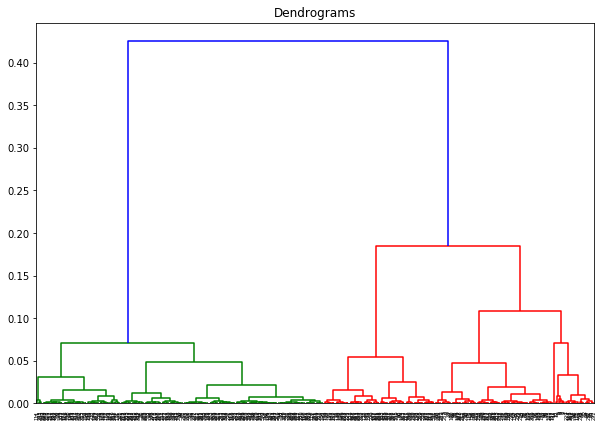

In [18]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(b, method='ward'))

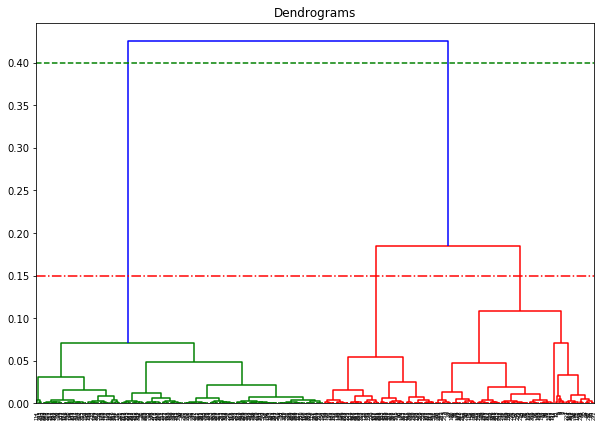

In [19]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(b, method='ward'))
plt.axhline(y=0.4, color='g', linestyle='--')
plt.axhline(y=0.15, color='r', linestyle='-.')

In [20]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
cluster.fit_predict(b)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
b['labels'] = cluster.labels_
b.groupby(["labels"]).count()

,cyl,disp
labels,,
0,397,397
1,1,1


In [22]:
Cluster = b.groupby(['labels'])

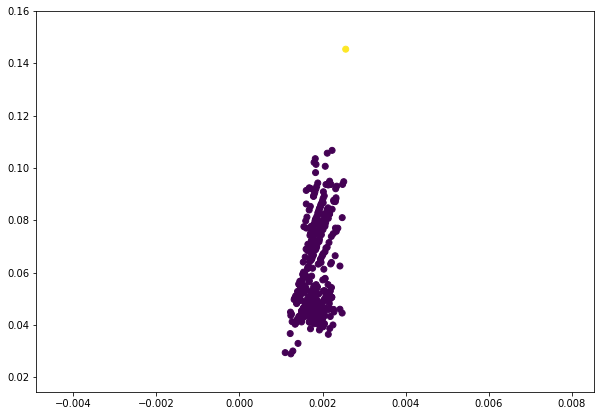

In [23]:
plt.figure(figsize=(10, 7))  
plt.scatter(b['cyl'], X['disp'], c=cluster.labels_) 